In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'men':[80.2, 80.8, 57.5, 98, 50.5, 73.8, 77.4, 59.7, 77.9, 52.6],
                   'women':[57.9, 57.3, 72.8, 48.2, 59.5, 48.3, 61.2, 53.9, 53.9, 70.7]
                  })

In [3]:
df.men.mean()-df.women.mean()

12.469999999999999

In [4]:
a=[2,7,4,3,6,4,1,2]
b=[5,2,4,8,1,6,7]

np.median(a)-np.median(b)

-1.5

In [5]:
np.median(df)

59.6

In [6]:
pd.Series(a).quantile([0.25,0.75],interpolation='midpoint')

0.25    2.0
0.75    5.0
dtype: float64

In [7]:
pd.Series(b).quantile([0.25,0.75],interpolation='linear')

0.25    3.0
0.75    6.5
dtype: float64

In [8]:
np.percentile(b,[0.25,0.75],interpolation='linear')

array([1.015, 1.045])

In [9]:
df = pd.DataFrame({
    'men': [80, 80.8, 57.5, 98, 50.5, 73.8, 77.4, 59.7, 77.9, 52.6],
    'women': [57.9, 57.3, 72.8, 48.2, 59.5, 48.3, 61.2, 53.9, 53.9, 70.7]
})

In [10]:
round(df.men.quantile(0.75,interpolation='midpoint'),1)

79.0

In [11]:
df = pd.DataFrame({'men': [80.2, 80.8, 57.5, 98, 50.5, 73.8, 77.4, 59.7, 77.9, 52.6],
                   'women': [57.9, 57.3, 72.8, 48.2, 59.5, 48.3, 61.2, 53.9, 53.9, 70.7]
                  })

In [12]:
def Q(df,q):
    return (df.quantile(q,interpolation='midpoint'))

def R(df):
    return round(df.max()-df.min(),1)

def IQR(df):
    return round(Q(df,0.75)-Q(df,0.25),1)

In [13]:
print(
    f'R(df.men) = {R(df.men)}\n'+
    f'R(df.women) = {R(df.women)}\n'+
    f'IQR(df.men) = {IQR(df.men)}\n'+
    f'IQR(df.women) = {IQR(df.women)}'
    )

R(df.men) = 47.5
R(df.women) = 24.6
IQR(df.men) = 20.5
IQR(df.women) = 6.5


In [14]:
m=df.men
w=df.women
print(
    f'std(m) = {m.std()}\n'+
    f'var(m) = {m.var()}\n'+
    f'std(w) = {w.std()}\n'+
    f'var(w) = {w.var()}\n'
)

std(m) = 15.182533824541057
var(m) = 230.5093333333333
std(w) = 8.27110767806962
var(w) = 68.41122222222222



In [15]:
np.std(m,ddof=1)

15.182533824541057

In [16]:
def outs_test(df):
    outs=[]
    out_low = Q(df,0.25)-1.5*IQR(df)
    out_high = Q(df,0.75)+1.5*IQR(df)
    for item in df:
        if item<out_low or item>out_high:
            outs.append(item)
    if len(outs)==0:
        print('выбросов нет')
    else:
        print(f'выбросы: {outs}')
    return

In [17]:
outs_test(df.women)

выбросы: [72.8, 70.7]


In [18]:
df_t = pd.DataFrame({
    'year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
    'temp': [-4.7, -6.1, -5.5, -3.3, -7.1, -3.1, -5.2, -7.3, -12.1, -6.6, -5.9, -6.3]
})
df_t

,year,temp
0,2007,-4.7
1,2008,-6.1
2,2009,-5.5
3,2010,-3.3
4,2011,-7.1
5,2012,-3.1
6,2013,-5.2
7,2014,-7.3
8,2015,-12.1
9,2016,-6.6


In [19]:
t=df_t.temp
t.mean()

-6.1000000000000005

In [20]:
t=df_t.temp
print(
    f'Среднее: {round(t.mean(),1)}\n'+
    f'Медиана: {round(np.median(t),1)}\n'+
    f'Стандартное отклонение: {round(t.std(),1)}\n'+
    f'Размах: {R(t)}\n'+
    f'Межквартильный размах: {IQR(t)}\n'
    )
outs_test(t)


Среднее: -6.1
Медиана: -6.0
Стандартное отклонение: 2.3
Размах: 9.0
Межквартильный размах: 1.9

выбросы: [-12.1]


In [21]:
df = pd.DataFrame({
    'city_a': [240, 440, 455, 475, 475, 490, 490, 500, 500, 500, 530, 550, 578, 580, 620, 687, 694, 703, 859],
    'city_b': [500, 564, 590, 600, 600, 600, 645, 650, 660, 667, 689, 692, 700, 700, 705, 735, 760, 764, 805]
})

<AxesSubplot:>

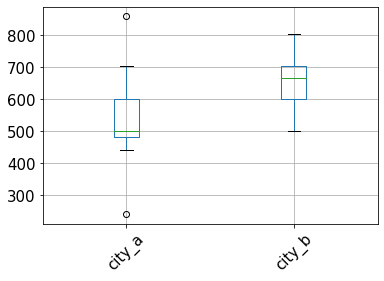

In [22]:
df.boxplot(rot=45,fontsize=15)

<AxesSubplot:ylabel='Frequency'>

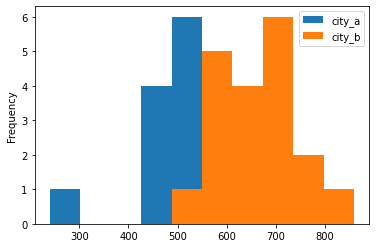

In [23]:
df.plot(kind='hist')

In [24]:
data = pd.DataFrame({
  'value': [48, 44, 42.5, 40.5, 40.5, 39, 39, 38, 38, 38, 35, 33, 30.2, 30, 26, 19.3, 27, 21]
})

<AxesSubplot:>

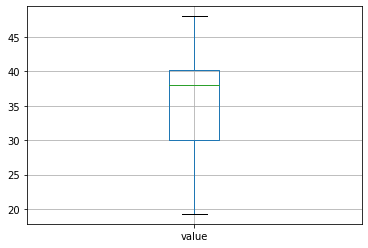

In [25]:
data.boxplot()

In [28]:
data.median(axis=0)

value    38.0
dtype: float64

In [29]:
df = pd.DataFrame({
    'group_a': [72, 66, 63.75, 60.75, 60.75, 58.5, 58.5, 57, 57, 57, 52.5, 49.5, 45.3, 45, 39, 28.95, 40.5, 31.5, 49],
    'group_b': [71, 72, 60, 50, 57, 77, 81, 58, 62, 61, 73, 74, 76, 65, 66, 67, 67, 67, 69]
})

<AxesSubplot:>

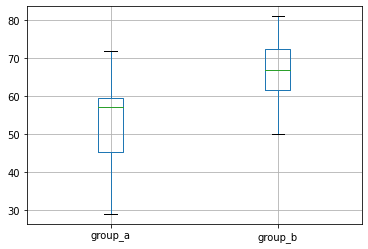

In [30]:
df.boxplot()